<a href="https://colab.research.google.com/github/peeyushsinghal/EVA/blob/main/S9-Assignment/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cloning the models git hub **

In [1]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 5.5 MB/s 
     |████████████████████████████████| 47.6 MB 146 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!git clone https://github.com/peeyushsinghal/common-pytorch-models.git

Cloning into 'common-pytorch-models'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 110 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 35.72 KiB | 2.55 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [3]:
import os
os.getcwd() 
os.chdir('common-pytorch-models')

#### Setting Device and Seed

In [4]:
# loading helper functions
from utils.helper import seed_all, get_device, get_mean_std_dev

In [5]:
# check for default device

device = get_device()
print (f' device Status : {device}')
device

 device Status : cuda


device(type='cuda')

In [6]:
## setting seed for reproducibility
SEED = 42 # arbit seed, why 42 - because in hitch hikers guide to galaxy it is answer to everything
seed_all(SEED)

### Loading data

In [7]:
# Getting Mean and Standard Deviation of CIFAR 10 dataset
mean, std_dev = get_mean_std_dev("CIFAR10")
print(f"Mean : {mean}   STD: {std_dev}") #Mean : [0.491 0.482 0.446]   STD: [0.247 0.243 0.261]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Mean : (0.4913996786152028, 0.4821584083946074, 0.4465309144454644)   STD: (0.24703223246328238, 0.2434851280000556, 0.26158784172796423)


### Applying Transformations

In [8]:
from utils.transforms import apply_transforms_custom_resnet # custom transformations for custom resnet

train_transforms, test_transforms = apply_transforms_custom_resnet(mean,std_dev)

### Train and Test data

In [9]:
from torchvision import datasets

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 **Labels**

In [10]:
labels = trainset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

 **Train and Test set Dataloader**

In [11]:
import torch
batch_size = 512 # as required 

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#### Visualizing Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

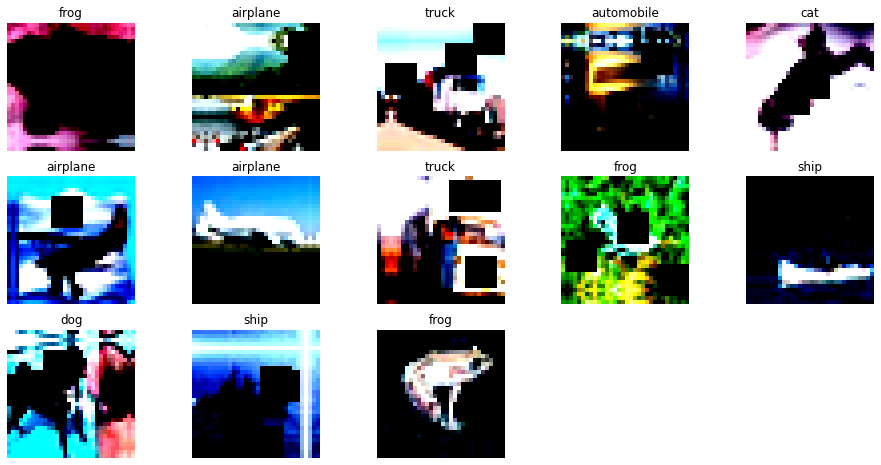

In [12]:
from utils.plot_utils import show_batch
show_batch(trainloader,labels,num_images=13) # for visualizing images

### 2. Network
Loading Model, understanding model params by checking summary

In [13]:
from models.custom_resnet import custom_resnet # Model
from utils.helper import model_summary # shows summary 

model = custom_resnet("BN").to(device) # creating model
model_summary(model, (3, 32, 32)) # shows model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

### 3. Training and Testing

*   includes test and train functions
*   includes loop function, where test can happen after each epoch is trained

In [14]:
import torch.optim as optim # for optimizer
import torch.nn as nn # for network, criterion
import torch.nn.functional as F 


criterion = nn.CrossEntropyLoss()

epochs = 24
# epochs = 1
lr = 0.001


optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=lr)

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',\
#                                                  factor=0.1, patience=10, threshold=0.0001, threshold_mode='abs')

### 3.1 One Cycle Rate Finder

  pip install torch-lr-finder -v --global-option="amp"


  0%|          | 0/98 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


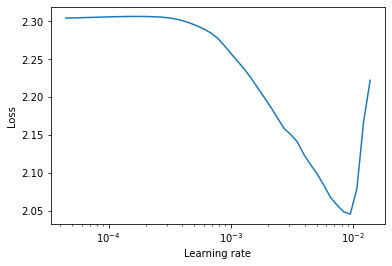

In [15]:
from utils.lrfinder import LRFinder
lr_finder = LRFinder(model,optimizer,criterion,device=device)
lr_finder.range_test(trainloader, testloader, start_lr=1e-5, end_lr=2, num_iter=len(trainloader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [16]:
best_loss = lr_finder.best_loss
LRMAX  = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
LRMIN = LRMAX / 10
print("Best Loss: %s\n Max Learning Rate: %s \n Min Learning Rate: %s" % (best_loss,LRMAX,LRMIN))

Best Loss: 2.045562135556848
 Max Learning Rate: 0.009442083890535309 
 Min Learning Rate: 0.0009442083890535309


In [17]:
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, LRMAX,  epochs=epochs, steps_per_epoch=len(trainloader), pct_start=5/24, div_factor=10.0, final_div_factor=10.0, three_phase=False, last_epoch=- 1, verbose=False)

In [18]:
from main import trainer, train, test # including wrapper function of train and test
# train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)
train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)

EPOCH: 1


Loss=1.3305370807647705 Batch_id=97 Accuracy=37.58: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 5299/10000 (52.99%)

EPOCH: 2


Loss=1.2330145835876465 Batch_id=97 Accuracy=55.47: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 6184/10000 (61.84%)

EPOCH: 3


Loss=0.981168270111084 Batch_id=97 Accuracy=62.97: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 6997/10000 (69.97%)

EPOCH: 4


Loss=0.8501313328742981 Batch_id=97 Accuracy=68.68: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 6860/10000 (68.60%)

EPOCH: 5


Loss=0.8192320466041565 Batch_id=97 Accuracy=72.66: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 7704/10000 (77.04%)

EPOCH: 6


Loss=0.6596350073814392 Batch_id=97 Accuracy=75.80: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 7907/10000 (79.07%)

EPOCH: 7


Loss=0.4861445128917694 Batch_id=97 Accuracy=77.86: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 8073/10000 (80.73%)

EPOCH: 8


Loss=0.6025633811950684 Batch_id=97 Accuracy=79.65: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 8104/10000 (81.04%)

EPOCH: 9


Loss=0.5482447147369385 Batch_id=97 Accuracy=81.25: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 8299/10000 (82.99%)

EPOCH: 10


Loss=0.5739644765853882 Batch_id=97 Accuracy=82.60: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0001, Accuracy: 8301/10000 (83.01%)

EPOCH: 11


Loss=0.5005548596382141 Batch_id=97 Accuracy=83.60: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8357/10000 (83.57%)

EPOCH: 12


Loss=0.3860888183116913 Batch_id=97 Accuracy=84.73: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8515/10000 (85.15%)

EPOCH: 13


Loss=0.3348631262779236 Batch_id=97 Accuracy=85.85: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8501/10000 (85.01%)

EPOCH: 14


Loss=0.38578006625175476 Batch_id=97 Accuracy=86.99: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8592/10000 (85.92%)

EPOCH: 15


Loss=0.3191969394683838 Batch_id=97 Accuracy=87.58: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8610/10000 (86.10%)

EPOCH: 16


Loss=0.41100677847862244 Batch_id=97 Accuracy=88.46: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8713/10000 (87.13%)

EPOCH: 17


Loss=0.35348325967788696 Batch_id=97 Accuracy=89.14: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8703/10000 (87.03%)

EPOCH: 18


Loss=0.3318176567554474 Batch_id=97 Accuracy=90.00: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8823/10000 (88.23%)

EPOCH: 19


Loss=0.3275820314884186 Batch_id=97 Accuracy=90.67: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8886/10000 (88.86%)

EPOCH: 20


Loss=0.24565726518630981 Batch_id=97 Accuracy=91.52: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8892/10000 (88.92%)

EPOCH: 21


Loss=0.2497399002313614 Batch_id=97 Accuracy=92.06: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8918/10000 (89.18%)

EPOCH: 22


Loss=0.1872614622116089 Batch_id=97 Accuracy=92.58: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8968/10000 (89.68%)

EPOCH: 23


Loss=0.20135940611362457 Batch_id=97 Accuracy=92.88: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8965/10000 (89.65%)

EPOCH: 24


Loss=0.16695024073123932 Batch_id=97 Accuracy=92.98: 100%|██████████| 98/98 [01:42<00:00,  1.05s/it]



Test set: Average loss: 0.0000, Accuracy: 8960/10000 (89.60%)



### 4. Checking results
visualizing train_accuracy, train_losses, test_accuracy, test_losses

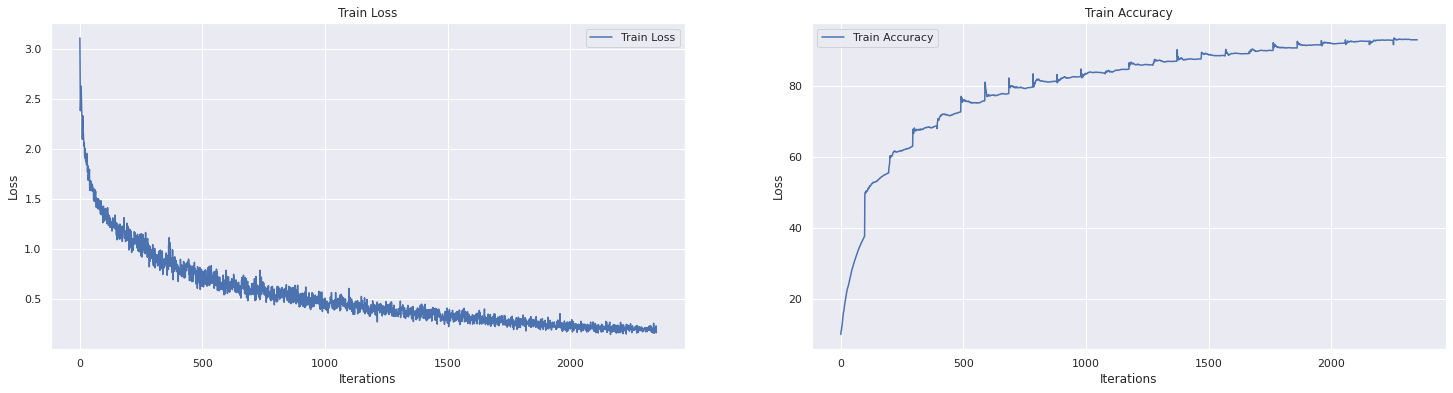

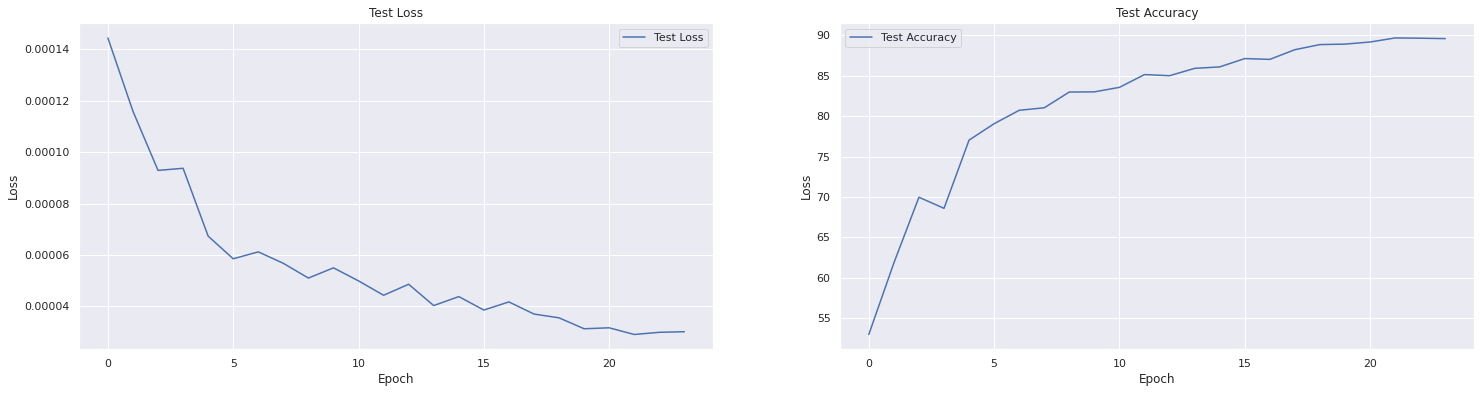

In [19]:
from utils.plot_utils import plot_metrics

plot_metrics(train_accuracy, train_losses, test_accuracy, test_losses)

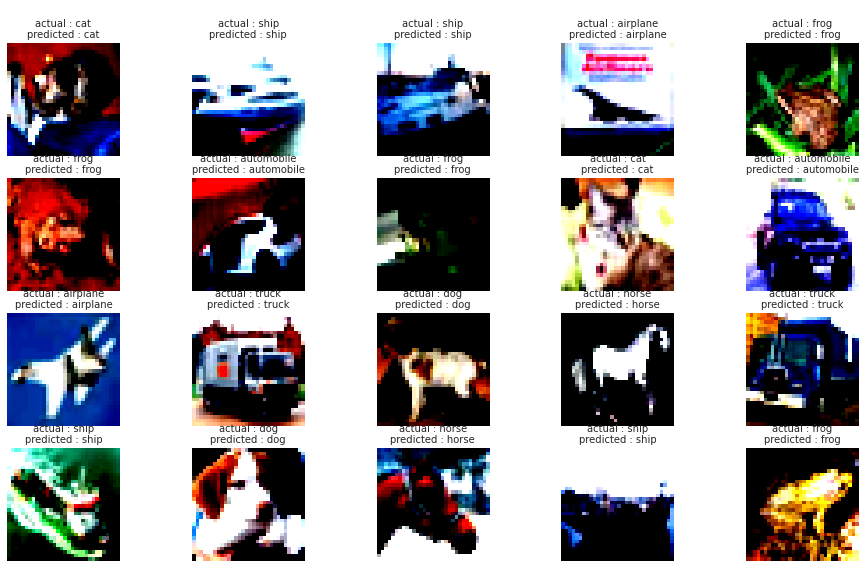

In [20]:
from utils.plot_utils import show_predicted_actual

show_predicted_actual(model, device, testloader, labels,num_images=20)

### Misclassified images

Total wrong predictions are 1040


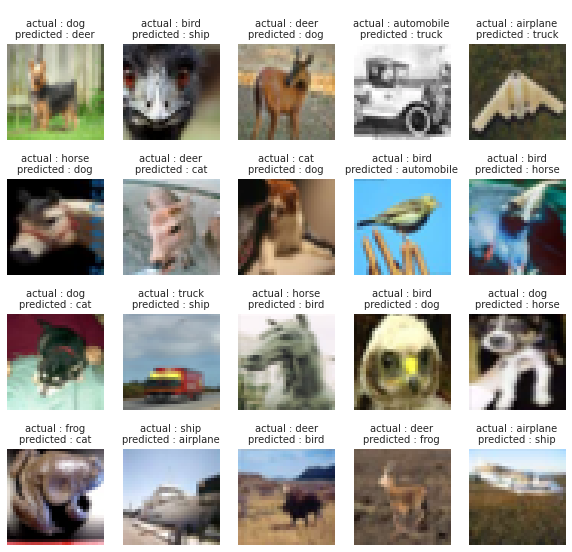

In [21]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, testloader, device, mean, std_dev)

*Class Level Accuarcy*

In [22]:
## Checking class level accuracy
from utils.helper import evaluate_classwise_accuracy
evaluate_classwise_accuracy(model, device, labels, testloader)


Accuracy of airplane : 71 %
Accuracy of automobile : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 58 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 81 %
Accuracy of horse : 83 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %


### Grad Cam output for 20 misclassified images

first top 10 images are shown
then next 10 images are shown

Generating Grad-CAM for conv_layer_1
Generating Grad-CAM for conv_layer_2


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


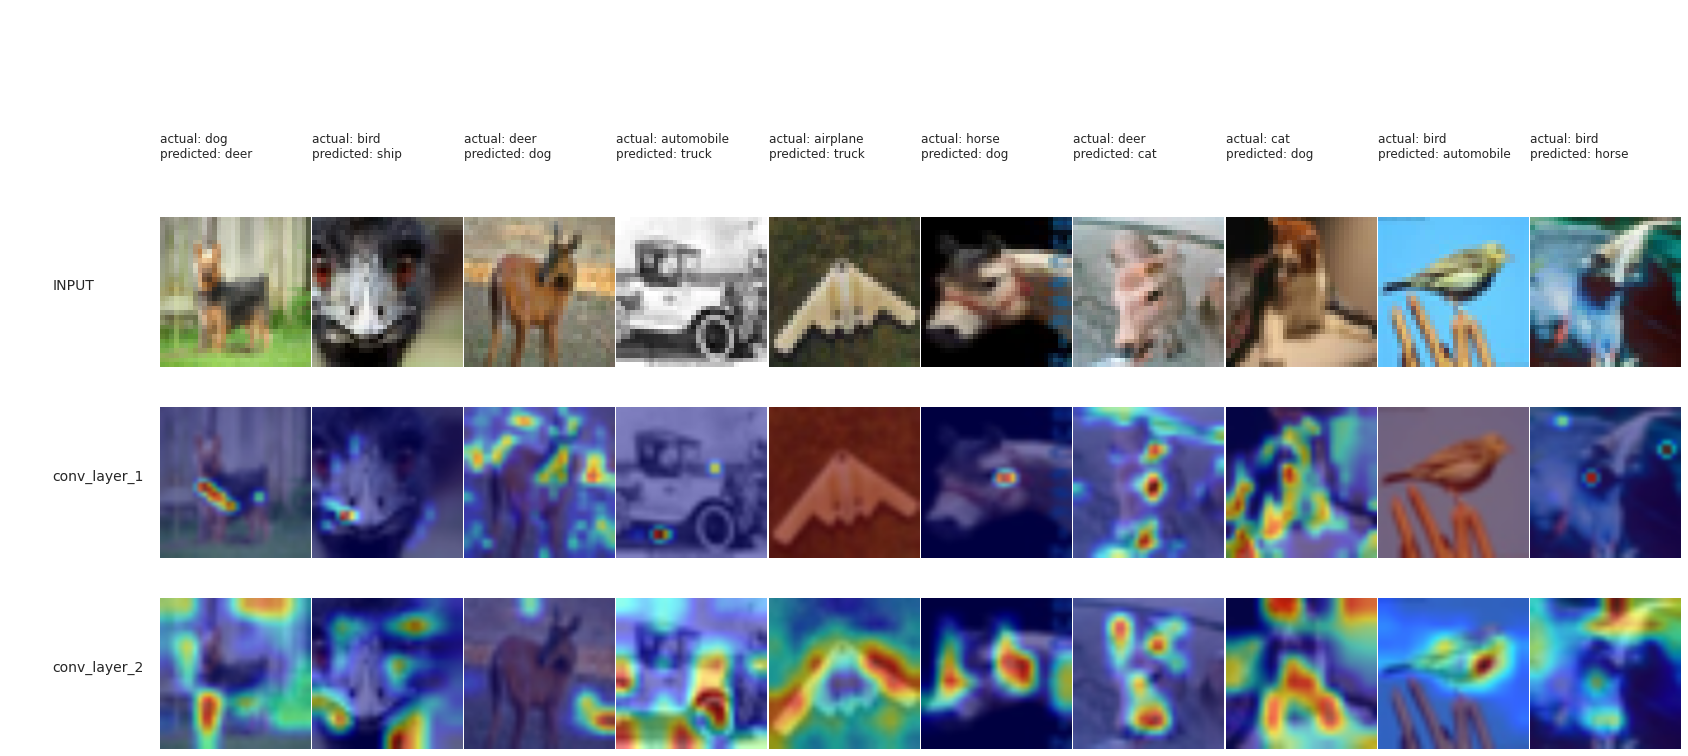

In [23]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["conv_layer_1", "conv_layer_2"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for conv_layer_1
Generating Grad-CAM for conv_layer_2


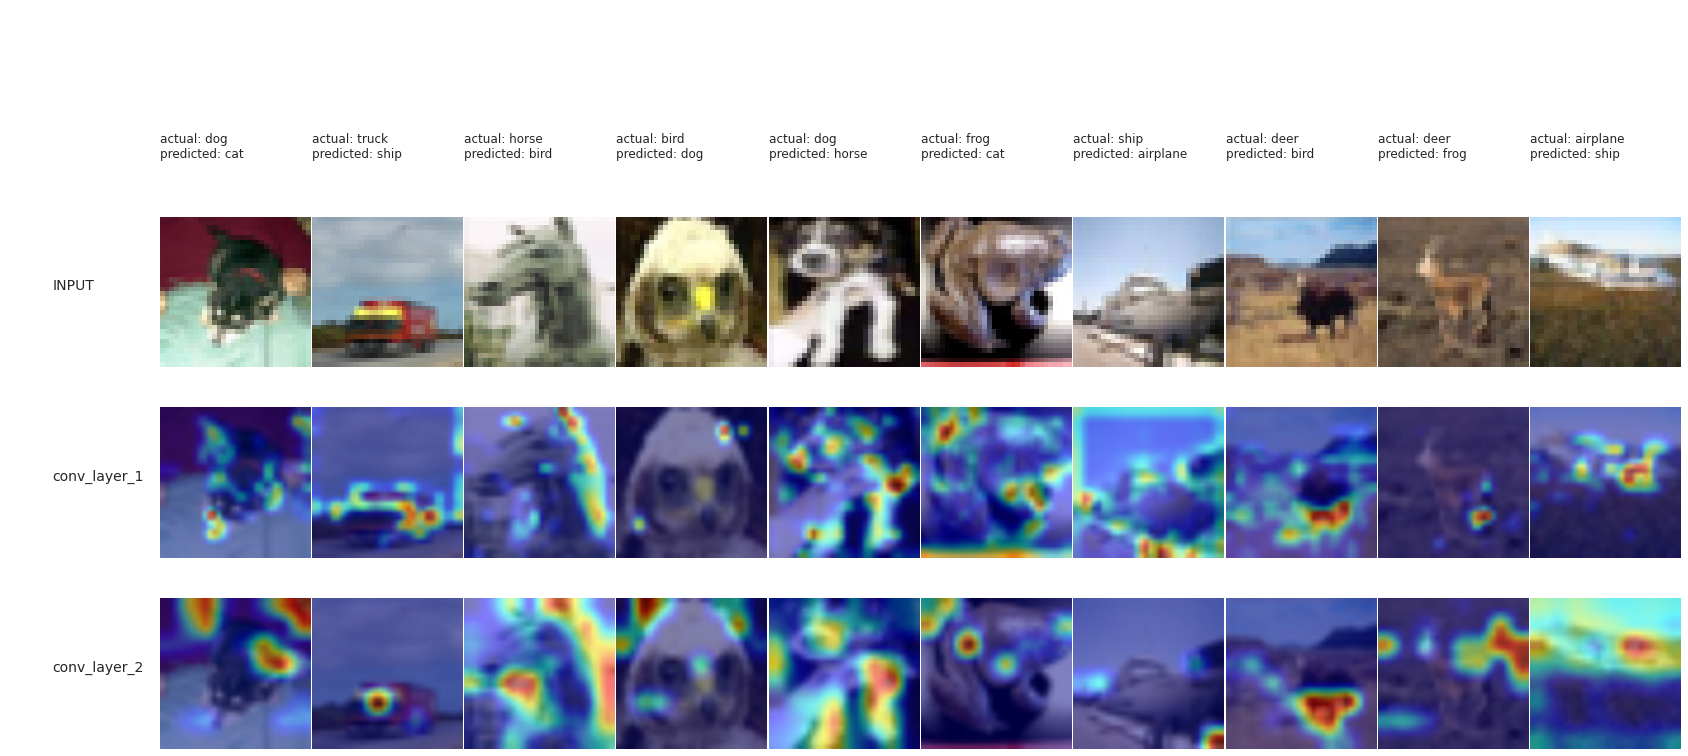

In [24]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["conv_layer_1", "conv_layer_2"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[10:20], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[10:20])